<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    34.345123  79.159216  49.760532  ...  173.234130  173.237233 -0.003103
      1.0    85.755530  75.757850  63.162529  ...  234.749728  234.671198  0.078530
      2.0    91.911626  35.334151  97.366906  ...  234.868156  234.678051  0.190105
      3.0    57.442499  60.758059  98.188231  ...  226.469349  226.446816  0.022533
      4.0    35.067634  73.652935  70.620707  ...  189.485330  189.349737  0.135592
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   34.717245  86.723220  53.552921  ...  185.014225  185.017611 -0.003386
      26.0   34.942692  41.844215  88.690972  ...  175.355037  175.439548 -0.084511
      27.0   38.659604  84.416221  64.307253  ...  197.370672  197.401068 -0.030396
      28.0   75.919770  97.424823  40.309709  ...  223.648431  223.669860 -0.021428
      29.0   67.993393  86.862913  94.878325  ...  259.775494  259.736307  0.039187

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    34.345123  79.159216  49.760532  ...  173.234130  173.237233 -0.003103
      1.0    85.755530  75.757850  63.162529  ...  234.749728  234.671198  0.078530
      2.0    91.911626  35.334151  97.366906  ...  234.868156  234.678051  0.190105
      3.0    57.442499  60.758059  98.188231  ...  226.469349  226.446816  0.022533
      4.0    35.067634  73.652935  70.620707  ...  189.485330  189.349737  0.135592
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   34.717245  86.723220  53.552921  ...  185.014225  185.017611 -0.003386
      26.0   34.942692  41.844215  88.690972  ...  175.355037  175.439548 -0.084511
      27.0   38.659604  84.416221  64.307253  ...  197.370672  197.401068 -0.030396
      28.0   75.919770  97.424823  40.309709  ...  223.648431  223.669860 -0.021428
      29.0   67.993393  86.862913  94.878325  ...  259.775494  259.736307  0.039187

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.345123,79.159216,49.760532,-0.030741,173.234130,173.237233,-0.003103
1,0.0,1.0,85.755530,75.757850,63.162529,0.073820,234.749728,234.671198,0.078530
2,0.0,2.0,91.911626,35.334151,97.366906,0.255473,234.868156,234.678051,0.190105
3,0.0,3.0,57.442499,60.758059,98.188231,0.080560,226.469349,226.446816,0.022533
4,0.0,4.0,35.067634,73.652935,70.620707,0.144053,189.485330,189.349737,0.135592
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.717245,86.723220,53.552921,0.020840,185.014225,185.017611,-0.003386
29996,999.0,26.0,34.942692,41.844215,88.690972,-0.122842,175.355037,175.439548,-0.084511
29997,999.0,27.0,38.659604,84.416221,64.307253,-0.012406,197.370672,197.401068,-0.030396
29998,999.0,28.0,75.919770,97.424823,40.309709,-0.005870,223.648431,223.669860,-0.021428


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    34.345123  79.159216  49.760532  ...  173.234130  173.237233 -0.003103
      1.0    85.755530  75.757850  63.162529  ...  234.749728  234.671198  0.078530
      2.0    91.911626  35.334151  97.366906  ...  234.868156  234.678051  0.190105
      3.0    57.442499  60.758059  98.188231  ...  226.469349  226.446816  0.022533
      4.0    35.067634  73.652935  70.620707  ...  189.485330  189.349737  0.135592
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   34.717245  86.723220  53.552921  ...  185.014225  185.017611 -0.003386
      26.0   34.942692  41.844215  88.690972  ...  175.355037  175.439548 -0.084511
      27.0   38.659604  84.416221  64.307253  ...  197.370672  197.401068 -0.030396
      28.0   75.919770  97.424823  40.309709  ...  223.648431  223.669860 -0.021428
      29.0   67.993393  86.862913  94.878325  ...  259.775494  259.736307  0.039187

[30000 rows x 7 columns]

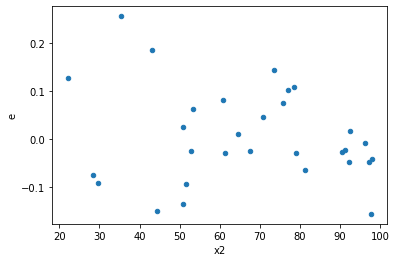

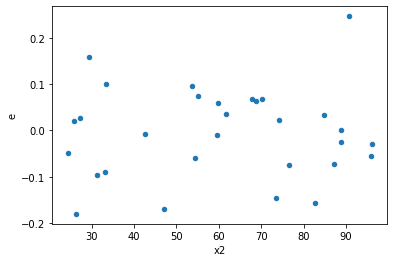

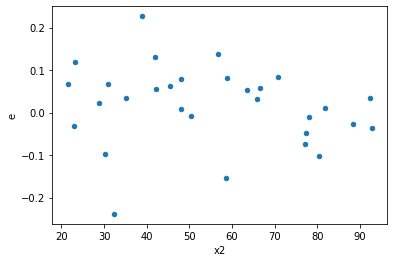

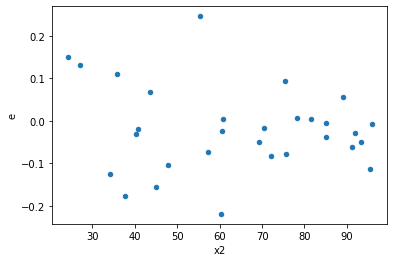

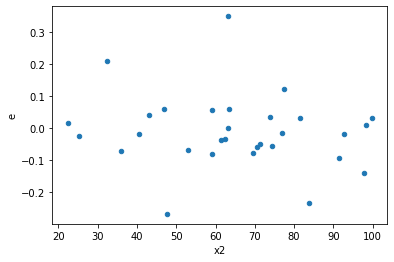

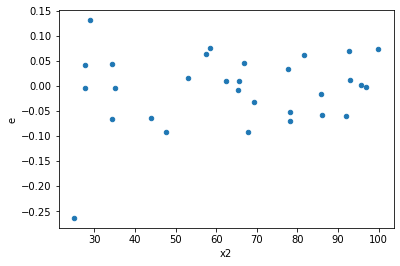

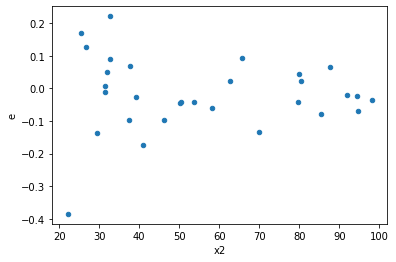

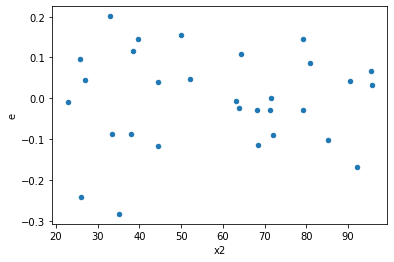

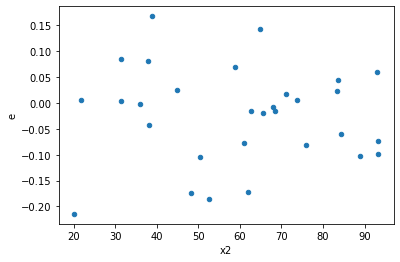

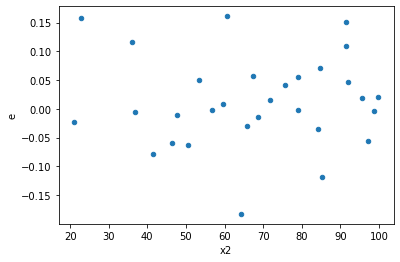

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,9.0,0.10729075250535962,0.1173923995785528,0.011921194722817736,0.013043599953172533,1.094152075899445,0.8955712928130655,0.5522143535934673,0.44778564640653273,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,0.03363652084274386,0.03722921755751931,0.0037373912047493174,0.004136579728613257,1.1068094031357134,0.8823194791375455,0.5588402604312273,0.44115973956877275,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,0.03891840653983857,0.0552920317694992,0.004324267393315397,0.006143559085499911,1.4207167426780403,0.6093008762897003,0.6953495618551498,0.30465043814485016,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,0.044062688166804975,0.062145857031954924,0.0048958542407561085,0.006905095225772769,1.41039640606342,0.6167148134005149,0.6916425932997425,0.30835740670025746,Reject001=1 : Homoscedasticity
20.0,9.0,9.0,0.02817711464210117,0.03169220558846087,0.0031307905157890187,0.0035213561764956525,1.1247498543057914,0.863852809006163,0.5680735954969185,0.4319264045030815,Reject001=1 : Homoscedasticity
22.0,9.0,9.0,0.034108421419882407,0.04267770642196175,0.0037898246022091565,0.004741967380217972,1.251236634395638,0.7439134626353079,0.6280432686823461,0.37195673131765394,Reject001=1 : Homoscedasticity
34.0,9.0,9.0,0.04466809009475611,0.05021897349214634,0.004963121121639568,0.005579885943571815,1.1242695487005359,0.8643423876061183,0.5678288061969409,0.43217119380305913,Reject001=1 : Homoscedasticity
64.0,9.0,9.0,0.055734525903080215,0.06182751866210347,0.006192725100342246,0.006869724295789274,1.1093216935157695,0.8797112005180032,0.5601443997409984,0.4398556002590016,Reject001=1 : Homoscedasticity
74.0,9.0,9.0,0.07003689249741113,0.07486059509440349,0.007781876944156792,0.008317843899378166,1.0688737381826396,0.9225929897149188,0.5387035051425406,0.4612964948574594,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.1440296900063976,0.03346232630577851,0.016003298889599733,0.003718036256197612,0.23232936420464528,0.04062466796055237,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.10729075250535962,0.1173923995785528,0.011921194722817736,0.013043599953172533,1.094152075899445,0.8955712928130655,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.12639501216389853,0.01729631475508867,0.01404389024043317,0.0019218127505654077,0.13684333312662883,0.006723428650051338,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,0.15751045579681053,0.027067626744796413,0.01750116175520117,0.003007514082755157,0.17184653937967026,0.015038565774618174,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.08908134264383909,0.06773201979984733,0.009897926960426566,0.007525779977760815,0.7603390091531328,0.6897861866522815,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.09961094194160433,0.02596030963062225,0.011067882437956037,0.0028844788478469166,0.2606170479327578,0.05787757603888781,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.24527345850700938,0.03693991657766567,0.02725260650077882,0.004104435175296186,0.1506070685451276,0.009483003989700518,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,0.21333743050883433,0.07052662451117037,0.023704158945426036,0.007836291612352263,0.33058720330021907,0.1146924672261287,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.1404193491235017,0.029126105394845853,0.0156021499026113,0.0032362339327606502,0.20742230737181985,0.02825268768733471,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      880
Reject001=0 : Heteroscedasticity    120
Name: Result_test, dtype: int64